In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# wine data를 표준화
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)


In [ ]:
wine.data.shape

(178, 13)

### 차원축소
- 13 차원을 2차원, 4차원 6차원으로 변경


In [ ]:
# 2차원
from sklearn.decomposition import PCA
pca2 = PCA(2)
wine_pca2 = pca2.fit_transform(wine_std) 
wine_pca2[:5]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

In [ ]:
pca2.explained_variance_ratio_, pca2.explained_variance_ratio_.sum()

(array([0.36198848, 0.1920749 ]), 0.5540633835693534)

In [ ]:
#4차원
pca4 = PCA(4)
wine_pca4 = pca4.fit_transform(wine_std) 
wine_pca4[:5]

array([[ 3.31675081, -1.44346263, -0.16573904, -0.21563119],
       [ 2.20946492,  0.33339289, -2.02645737, -0.29135832],
       [ 2.51674015, -1.0311513 ,  0.98281867,  0.72490231],
       [ 3.75706561, -2.75637191, -0.17619184,  0.56798331],
       [ 1.00890849, -0.86983082,  2.02668822, -0.40976579]])

In [ ]:
pca4.explained_variance_ratio_, pca4.explained_variance_ratio_.sum()

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ]), 0.735989990758993)

In [ ]:
#4차원
pca6 = PCA(6)
wine_pca6 = pca6.fit_transform(wine_std) 
wine_pca6[:5]

array([[ 3.31675081, -1.44346263, -0.16573904, -0.21563119,  0.69304284,
        -0.22388013],
       [ 2.20946492,  0.33339289, -2.02645737, -0.29135832, -0.25765463,
        -0.92712024],
       [ 2.51674015, -1.0311513 ,  0.98281867,  0.72490231, -0.25103312,
         0.54927605],
       [ 3.75706561, -2.75637191, -0.17619184,  0.56798331, -0.31184159,
         0.114431  ],
       [ 1.00890849, -0.86983082,  2.02668822, -0.40976579,  0.2984575 ,
        -0.4065196 ]])

In [ ]:
pca6.explained_variance_ratio_, pca6.explained_variance_ratio_.sum()

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
        0.04935823]), 0.8509811607477046)

### 2. PCA 전후 비교

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [ ]:
#원본 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify=wine.target, random_state=2022
)
rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

1.0

In [ ]:
# 2개 차원으로 축소한 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca2, wine.target, stratify=wine.target, random_state=2022
)
rfc2 = RandomForestClassifier(random_state=2022)
rfc2.fit(X_train,y_train)
rfc2.score(X_test,y_test)

1.0

In [ ]:
# 4개 차원으로 축소한 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca4, wine.target, stratify=wine.target, random_state=2022
)
rfc4 = RandomForestClassifier(random_state=2022)
rfc4.fit(X_train,y_train)
rfc4.score(X_test,y_test)

1.0

In [ ]:
# 6개 차원으로 축소한 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca6, wine.target, stratify=wine.target, random_state=2022
)
rfc6 = RandomForestClassifier(random_state=2022)
rfc6.fit(X_train,y_train)
rfc6.score(X_test,y_test)

1.0

### 3. 시각화

In [ ]:
df = pd.DataFrame(wine_pca2, columns = ["PC1","PC2"])
df['target'] = wine.target
df.head()

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


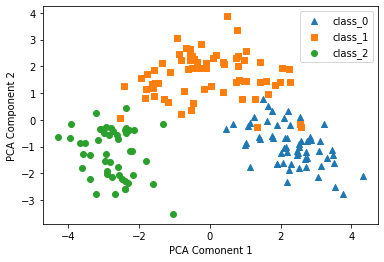

In [ ]:
#PC1, PC2 시각화(품종별로 마커의 색과 모양 다르게 표현)
markers = ['^','s','o']
for i, marker in enumerate(markers):
  x_data = df[df.target == i]['PC1']
  y_data = df[df.target == i]['PC2']
  plt.scatter(x_data,y_data,marker=marker,label=wine.target_names[i])
plt.legend()
plt.xlabel("PCA Comonent 1"), plt.ylabel("PCA Component 2")
plt.show()


### 4. Code refactoring

In [ ]:
def pca_accuracy(X,y):
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, stratify=y, random_state=2022
  )
  rfc = RandomForestClassifier(random_state=2022)
  rfc.fit(X_train,y_train)
  score =  rfc.score(X_test,y_test)
  return score

In [ ]:
for n in [2,4,6]:
  pca = PCA(n_components=n)
  wine_pca = pca.fit_transform(wine_std)
  explained = pca.explained_variance_ratio_.sum()
  acc = pca_accuracy(wine_pca,wine.target)
  print(f'PCA{n}: 설명력-{explained:.4f},정확도-{acc:.4f}')

PCA2: 설명력-0.5541,정확도-1.0000
PCA4: 설명력-0.7360,정확도-1.0000
PCA6: 설명력-0.8510,정확도-1.0000
